<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_REM_NREM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/REM_NREM.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [36]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [37]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [38]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [39]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,1.687263
1,MedianF_Alpha_F4,2.780939
2,MeanF_Alpha_F4,753.112065
3,Spectral Edge_Alpha_F4,642.121812
4,PeakF_Alpha_F4,117.921757
...,...,...
70,MeanP_Gamma_O2,0.000222
71,MedianF_Gamma_O2,5.486241
72,MeanF_Gamma_O2,62.765569
73,Spectral Edge_Gamma_O2,217.094290


In [40]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_F4  2892.561369
34           PeakF_Beta_C4  1210.451970
59           PeakF_Beta_O2  1114.871733
54          PeakF_Alpha_O2   970.795331
2           MeanF_Alpha_F4   753.112065
6          MedianF_Beta_F4   703.111425
27          MeanF_Alpha_C4   671.632807
3   Spectral Edge_Alpha_F4   642.121812
53  Spectral Edge_Alpha_O2   612.051696
19          PeakF_Delta_F4   595.900941


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_F4  2892.561369
34           PeakF_Beta_C4  1210.451970
59           PeakF_Beta_O2  1114.871733
54          PeakF_Alpha_O2   970.795331
2           MeanF_Alpha_F4   753.112065
6          MedianF_Beta_F4   703.111425
27          MeanF_Alpha_C4   671.632807
3   Spectral Edge_Alpha_F4   642.121812
53  Spectral Edge_Alpha_O2   612.051696
19          PeakF_Delta_F4   595.900941


In [42]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01303116 0.01347744 0.03316362 0.02306775 0.01219694 0.01155634
 0.02985807 0.01901011 0.01852745 0.01856837 0.01070135 0.01125791
 0.01385323 0.01482808 0.00798329 0.00861406 0.01004574 0.01291677
 0.01520105 0.01156368 0.01128975 0.01716042 0.01726619 0.01159734
 0.00706591 0.01326332 0.01156657 0.01966429 0.01648492 0.0103447
 0.01321961 0.01993963 0.01827258 0.01533523 0.01014924 0.01254274
 0.0118428  0.01263308 0.01157074 0.00933491 0.01049307 0.01309335
 0.0152477  0.0205506  0.00929804 0.01122261 0.01309414 0.01319544
 0.0104203  0.00764354 0.01204067 0.01531134 0.01446308 0.01443097
 0.0089093  0.01064289 0.01339188 0.0132837  0.01377658 0.00922802
 0.01430184 0.0118909  0.01514864 0.01594792 0.00820946 0.01015796
 0.00906461 0.01265296 0.01002042 0.00793758 0.01042188 0.01386671
 0.01311143 0.01078098 0.00678313]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

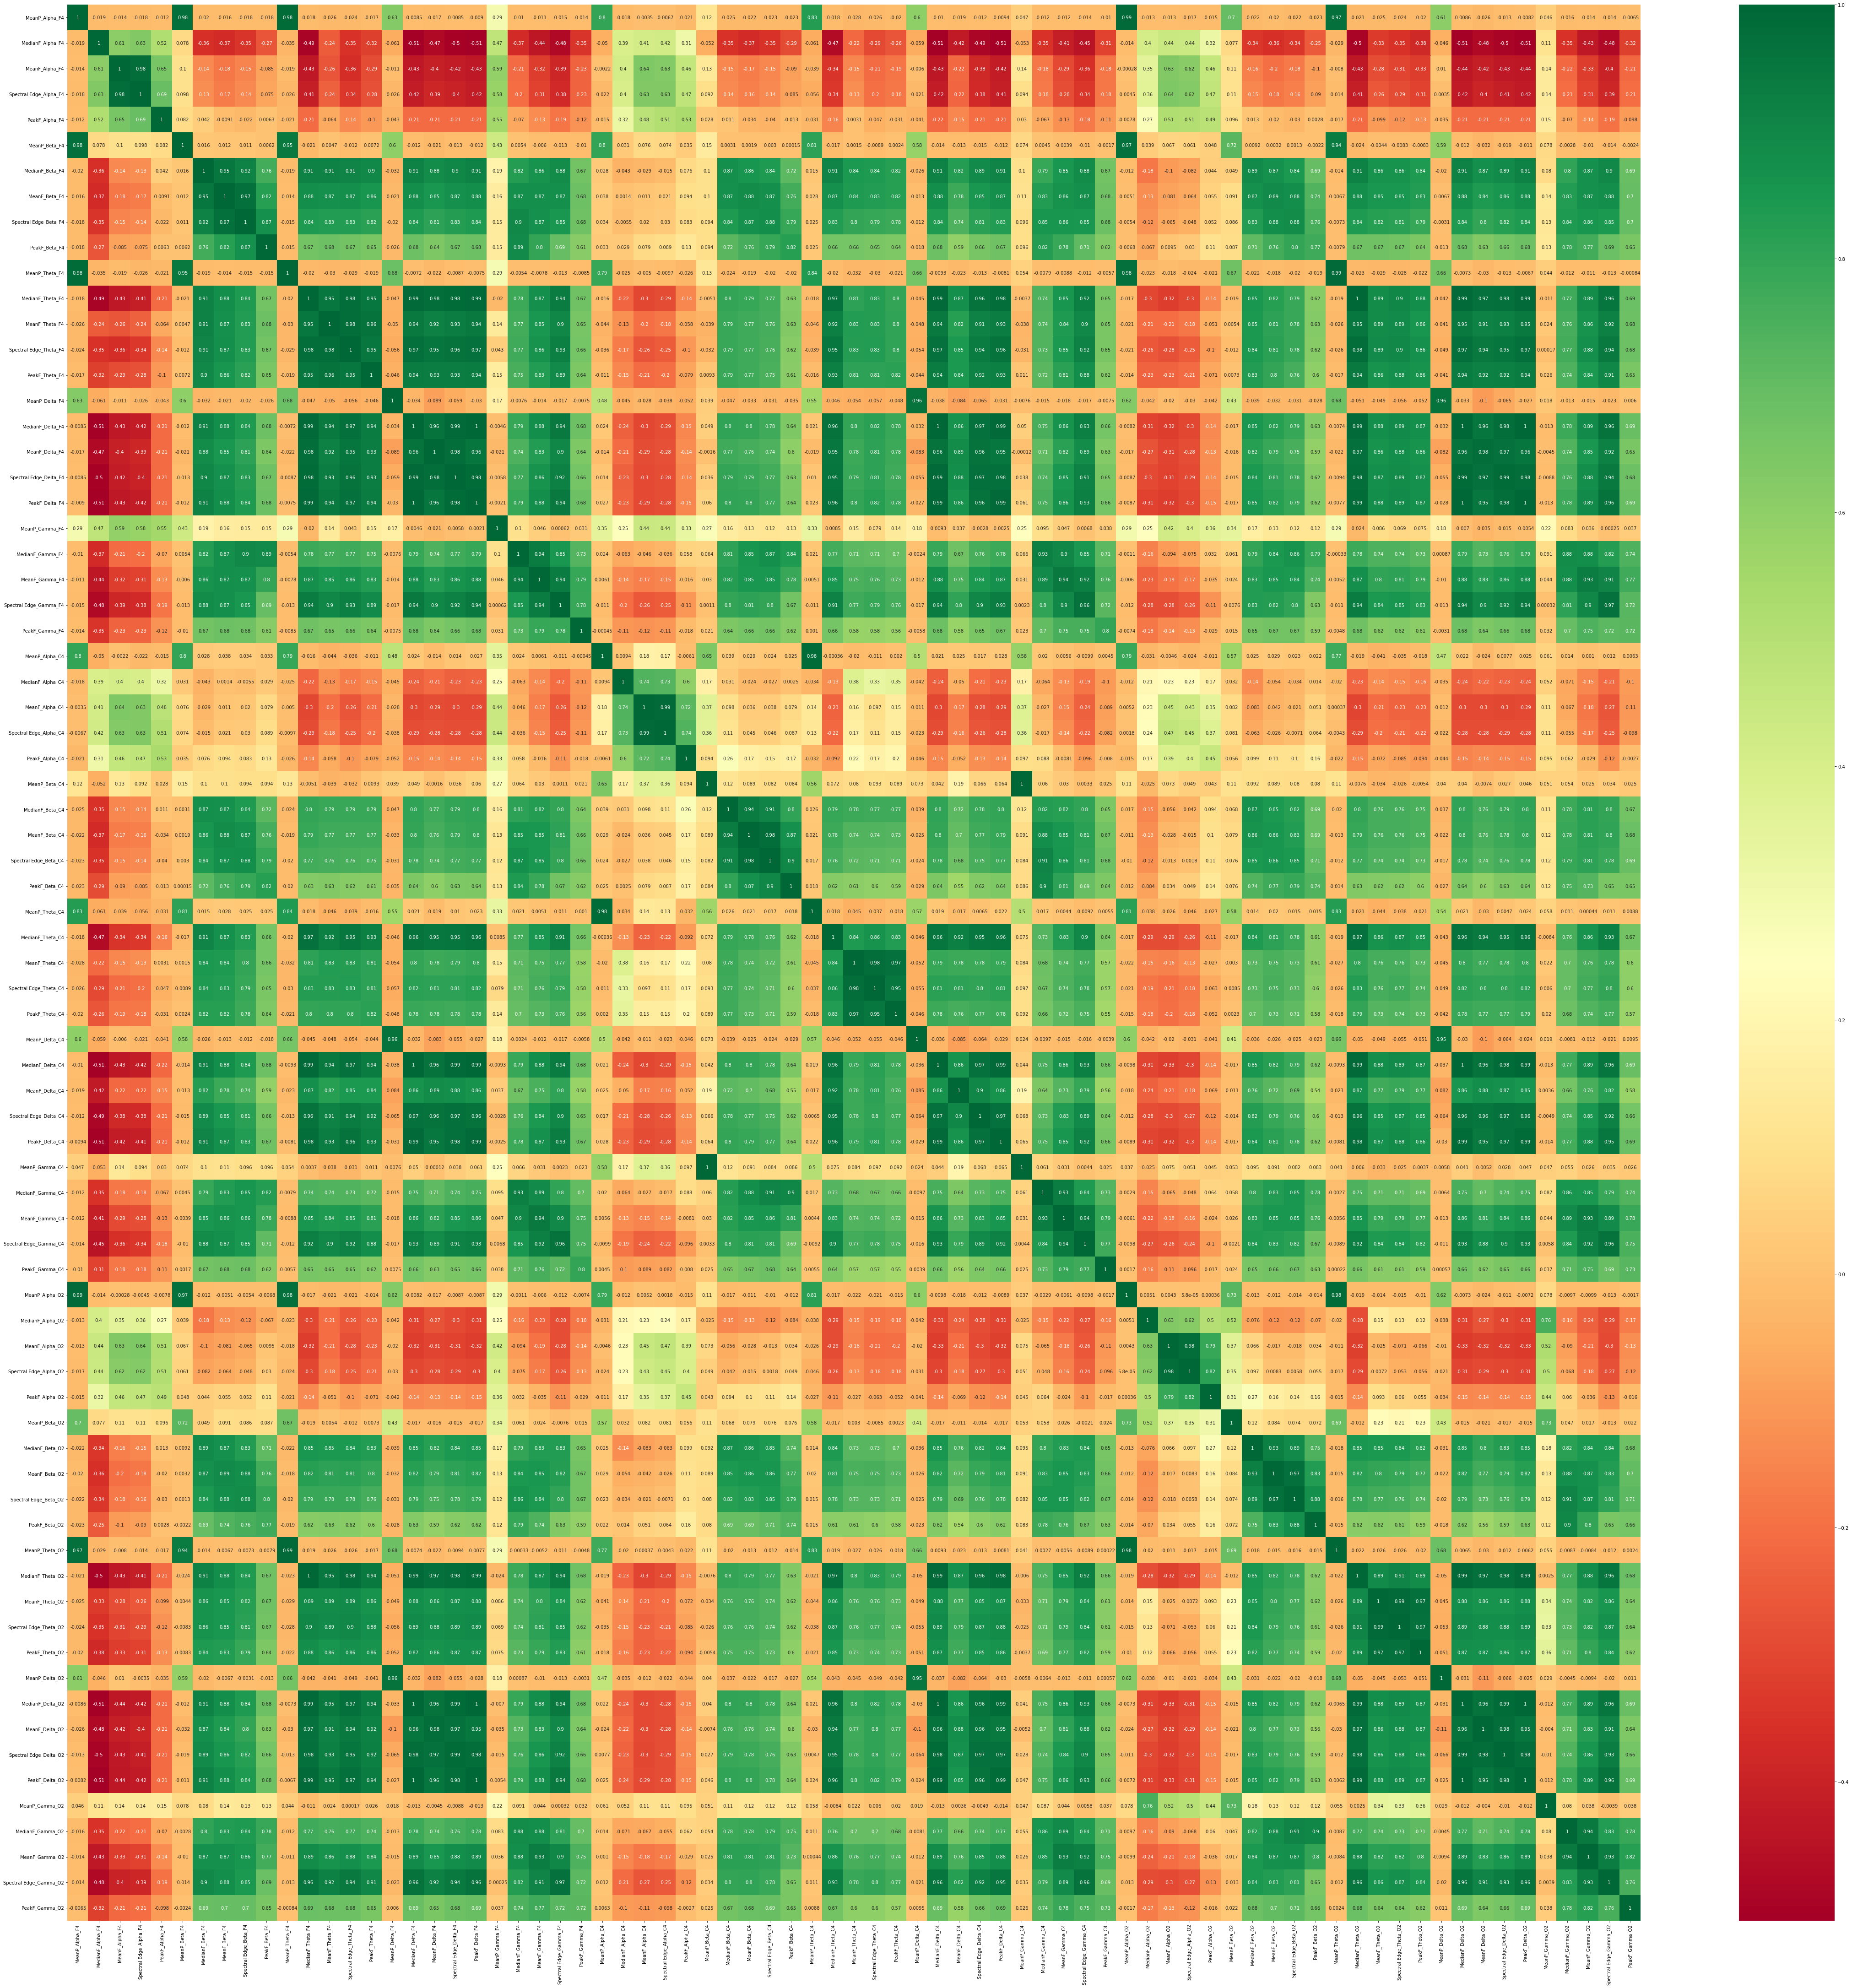

In [43]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation